In [ ]:
import numpy as np
import pandas as pd
 
import matplotlib.pyplot as plt
import seaborn as sns
 
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
 
import os

In [ ]:
data = pd.read_csv('OnlineRetail.csv', encoding = 'unicode_escape')

print(data.shape)

(541909, 8)


In [ ]:
# checking the head of the data

data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
# describing the data

data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
# taking out information about the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
# checking the data-types of the data

data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [ ]:
data = data[(data['Quantity'] >= 0) | (data['Quantity'].isnull())]
print(data.shape)

(531285, 9)


## Data Visualization

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


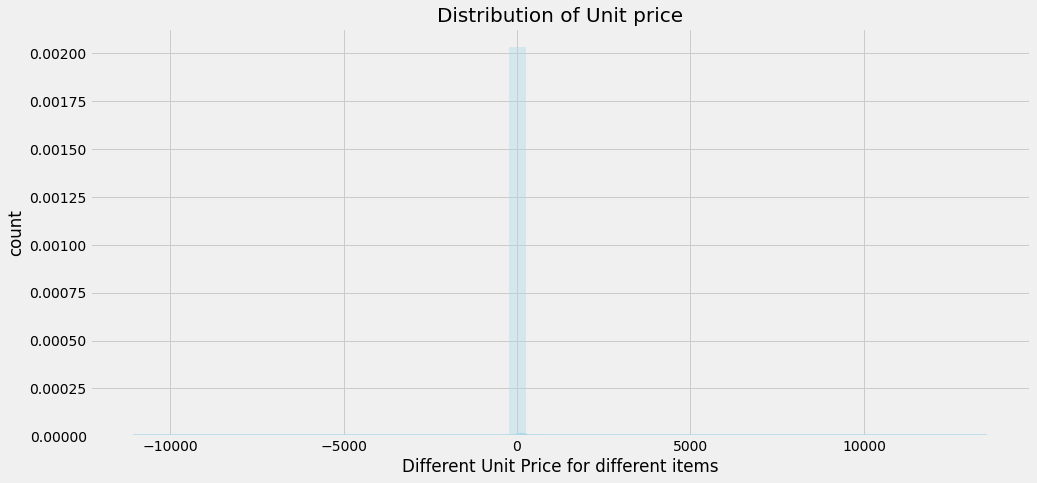

In [ ]:
# visualizing the unitprice

plt.rcParams['figure.figsize'] = (15, 7)
plt.style.use('fivethirtyeight')
sns.distplot(data['UnitPrice'], color = 'lightblue')
plt.title('Distribution of Unit price', fontsize = 20)
plt.xlabel('Different Unit Price for different items')
plt.ylabel('count')
plt.show()

In [ ]:
# checking the different values for country in the dataset

data['Country'].value_counts().head(20)

United Kingdom     486286
Germany              9042
France               8408
EIRE                 7894
Spain                2485
Netherlands          2363
Belgium              2031
Switzerland          1967
Portugal             1501
Australia            1185
Norway               1072
Italy                 758
Channel Islands       748
Finland               685
Cyprus                614
Sweden                451
Unspecified           446
Austria               398
Denmark               380
Poland                330
Name: Country, dtype: int64

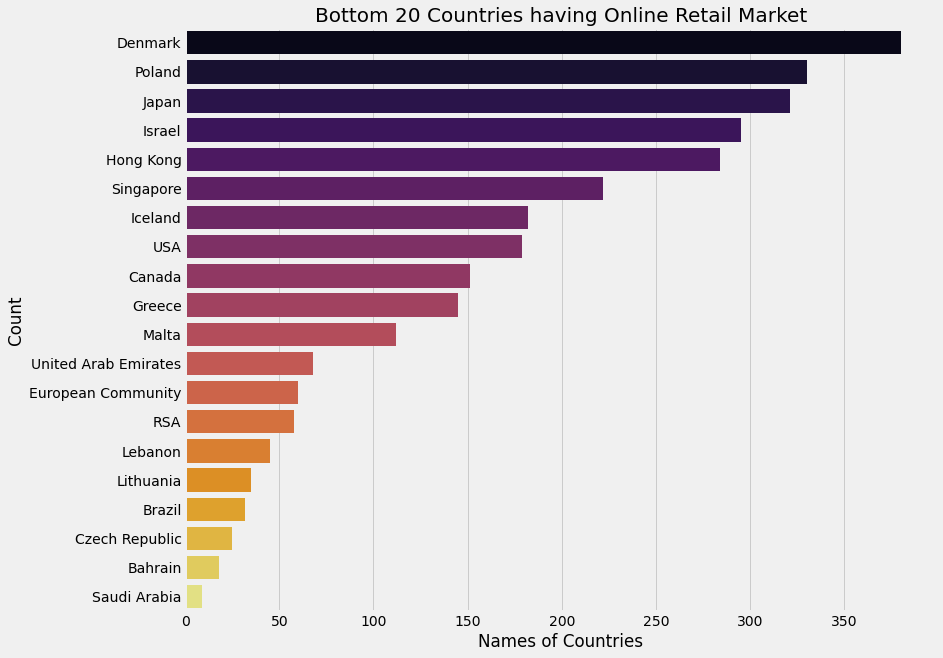

In [ ]:
# checking the different values for country in the dataset

plt.rcParams['figure.figsize'] = (12, 10)
a = data['Country'].value_counts().tail(20)
sns.barplot(x = a.values, y = a.index, palette = 'inferno')
plt.title('Bottom 20 Countries having Online Retail Market', fontsize = 20)
plt.xlabel('Names of Countries')
plt.ylabel('Count')
plt.show()

Country
Netherlands             200937
EIRE                    147447
Germany                 119263
France                  112104
Australia                84209
Sweden                   36083
Switzerland              30630
Spain                    27951
Japan                    26016
Belgium                  23237
Norway                   19338
Portugal                 16258
Finland                  10704
Channel Islands           9491
Denmark                   8235
Italy                     8112
Cyprus                    6361
Singapore                 5241
Austria                   4881
Hong Kong                 4773
Israel                    4409
Poland                    3684
Unspecified               3300
Canada                    2763
Iceland                   2458
USA                       2458
Greece                    1557
United Arab Emirates       982
Malta                      970
Czech Republic             671
Lithuania                  652
European Community         499


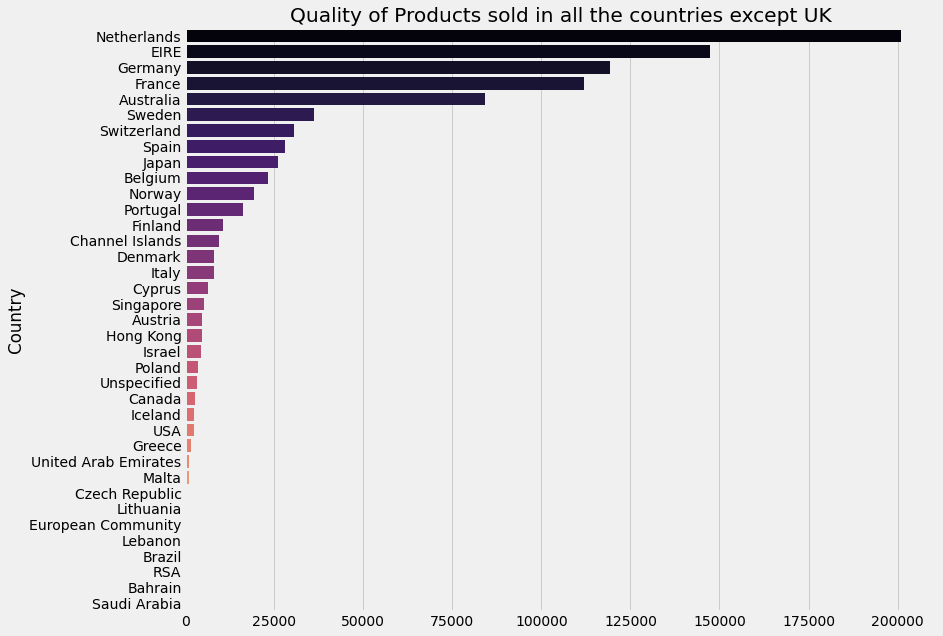

In [ ]:
# checking how many quantity of products have been sold online from each country

a = data['Quantity'].groupby(data['Country']).agg('sum').sort_values(ascending = False)[1:]
print(a)

sns.barplot(x = a.values, y = a.index, palette = 'magma')
plt.title('Quality of Products sold in all the countries except UK')
plt.show()

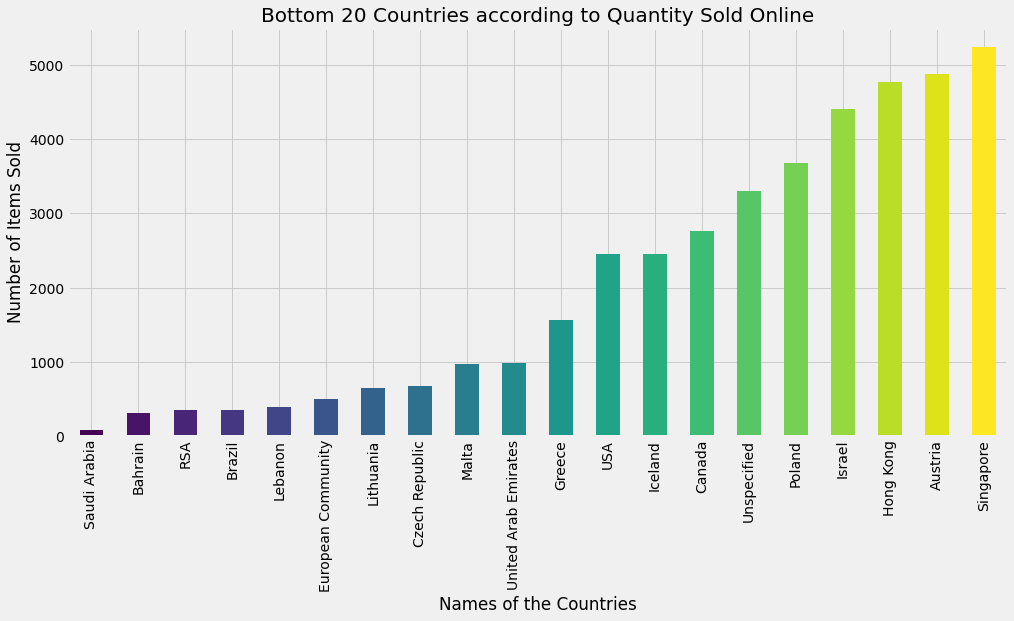

In [ ]:
# Having a look at the bottom 20 Countries in terms of Quantities according to the countries

color = plt.cm.viridis(np.linspace(0, 1, 20))
data['Quantity'].groupby(data['Country']).agg('sum').sort_values(ascending = True).head(20).plot.bar(figsize = (15, 7),
                                                                                                    color = color)

plt.title('Bottom 20 Countries according to Quantity Sold Online', fontsize = 20)
plt.xlabel('Names of the Countries')
plt.ylabel('Number of Items Sold')
plt.show()

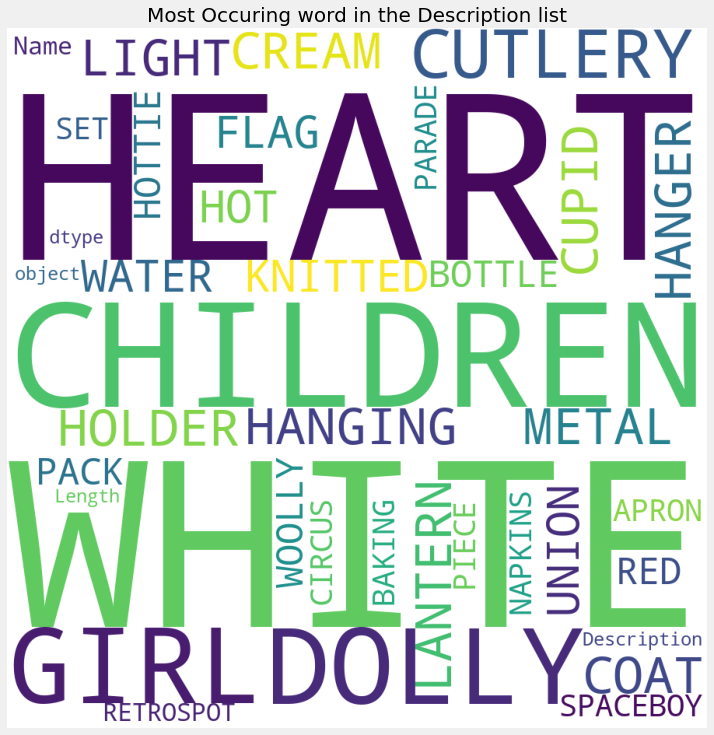

In [ ]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'white', width = 900, height = 900).generate(str(data['Description']))

print(wordcloud)
plt.rcParams['figure.figsize'] = (12, 12)
plt.axis('off')
plt.imshow(wordcloud)
plt.title('Most Occuring word in the Description list', fontsize = 20)
plt.show()

In [ ]:
# sales column
data['Sales'] = data['UnitPrice'] * data['Quantity']

Country
Netherlands             285446.34
EIRE                    283453.96
Germany                 228867.14
France                  209715.11
Australia               138521.31
Spain                    61577.11
Switzerland              57089.90
Belgium                  41196.34
Sweden                   38378.33
Japan                    37416.37
Norway                   36165.44
Portugal                 33747.10
Finland                  22546.08
Singapore                21279.29
Channel Islands          20450.44
Denmark                  18955.34
Italy                    17483.24
Hong Kong                15691.80
Cyprus                   13590.38
Austria                  10198.68
Israel                    8135.26
Poland                    7334.65
Greece                    4760.52
Unspecified               4749.79
Iceland                   4310.00
Canada                    3666.38
USA                       3580.39
Malta                     2725.59
United Arab Emirates      1902.28
Lebano

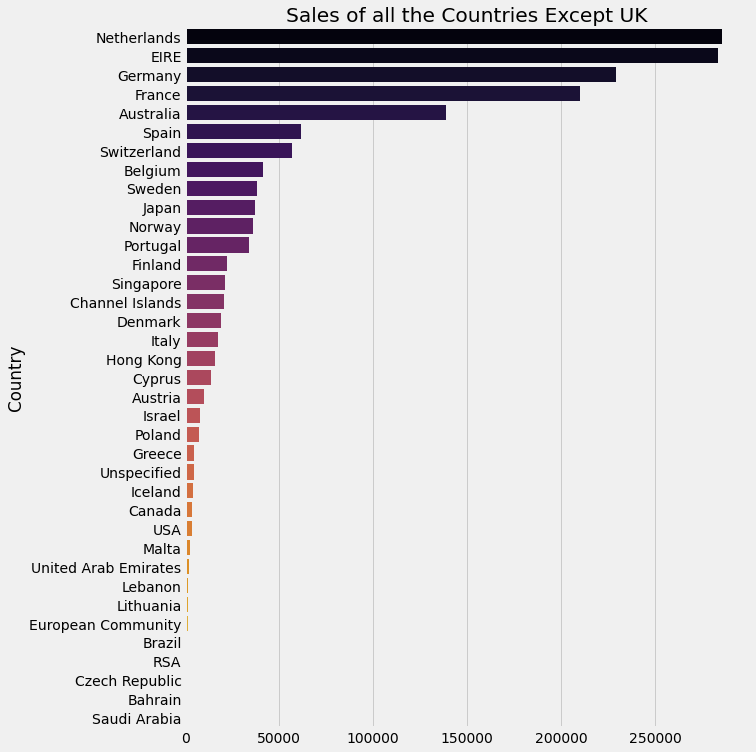

In [ ]:
# each country's sales

plt.rcParams['figure.figsize'] = (9, 12)
a = data['Sales'].groupby(data['Country']).agg('sum').sort_values(ascending = False)[1:]
print(a)
sns.barplot(x = a.values, y = a.index, palette = 'inferno')
plt.title('Sales of all the Countries Except UK')
plt.show()

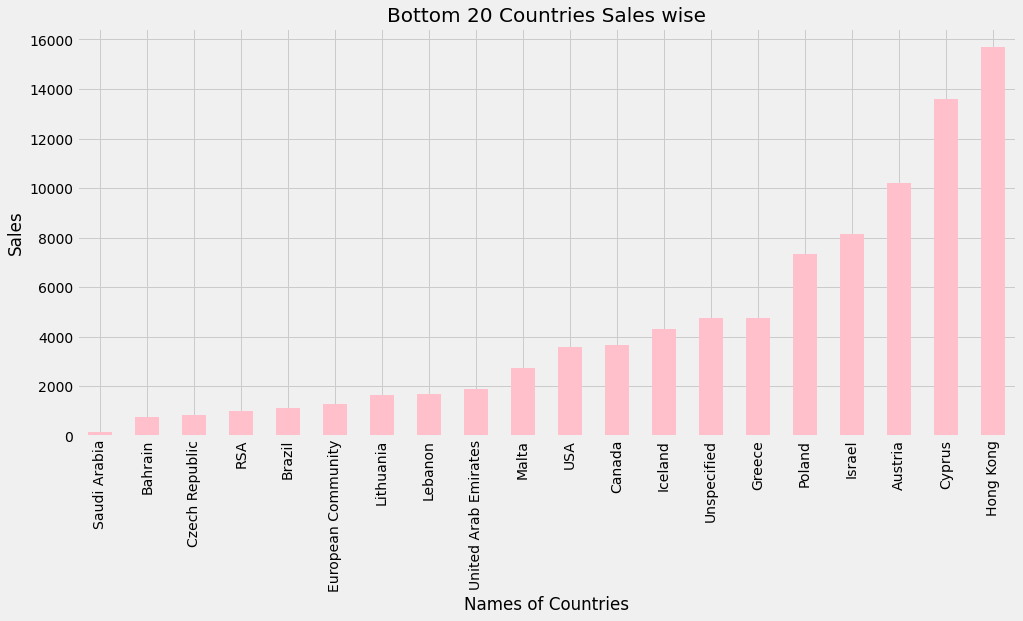

In [ ]:
# looking at the bottom 20 countries sales wise

data['Sales'].groupby(data['Country']).agg('sum').sort_values(ascending = True).head(20).plot.bar(figsize = (15, 7), color = 'pink')
plt.title('Bottom 20 Countries Sales wise', fontsize = 20)
plt.xlabel('Names of Countries')
plt.ylabel('Sales')
plt.show()

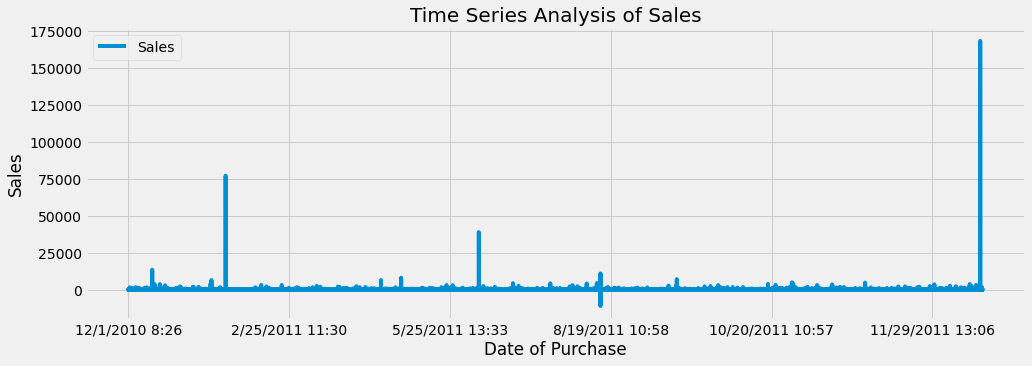

In [ ]:
# let's look at Sales vs Invoicedate (Time series Analysis)
#!!!!!!!!!!!!()
plt.rcParams['figure.figsize'] = (15, 5)
data.plot(x = 'InvoiceDate', y = 'Sales')
plt.title("Time Series Analysis of Sales", fontsize = 20)
plt.xlabel('Date of Purchase')
plt.ylabel('Sales')
plt.show()

In [ ]:
# checking how many unique customer IDs are there

x = data['CustomerID'].nunique()

# printing the value
print("There are {} number of different customers".format(x))

There are 4339 number of different customers


In [ ]:
# checking different number of unique countries present in this dataset

x = data['Country'].nunique()

# printing the result
print("There are {} number of different countries who do online retailing from UK".format(x))

There are 38 number of different countries who do online retailing from UK


Use this function to plot time series function for any country which is in the dataset

In [1]:
# defining a function to plot time-series plot for any country
#!!!(!!!!!)!!!!
def time_series(country):
  dataset = data[data['Country'] == country]
  dataset.plot(x = 'InvoiceDate', y = 'Sales')
  

Text(0.5, 1.0, 'Time-Series plot for Netherland')

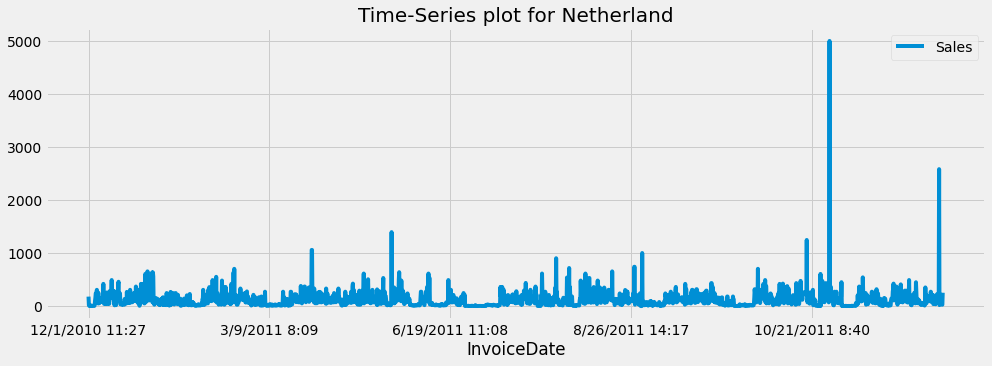

In [ ]:
#!!!!!!!!!!
time_series('Netherlands')
plt.title('Time-Series plot for Netherland', fontsize = 20)

Text(0.5, 1.0, 'Time-Series plot for Switzerland')

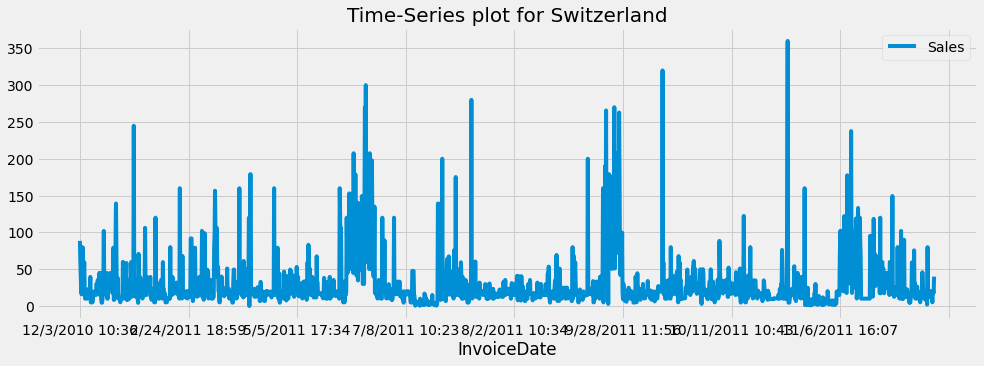

In [ ]:
#!!!!!!!!!!
time_series('Switzerland') #countryname
plt.title('Time-Series plot for Switzerland', fontsize = 20)

Text(0.5, 1.0, 'Time-Series plot for Italy')

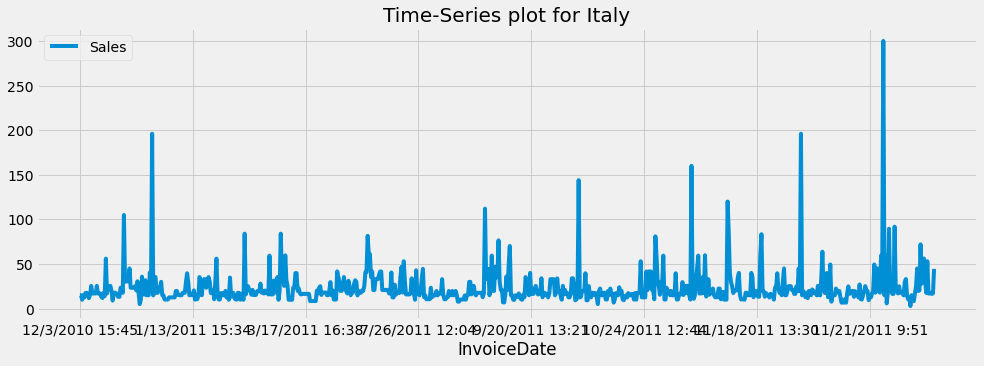

In [ ]:
#!!!!!!!!!!
time_series('Italy')
plt.title('Time-Series plot for Italy', fontsize = 20)

Text(0.5, 1.0, 'Time-Series plot for Austria')

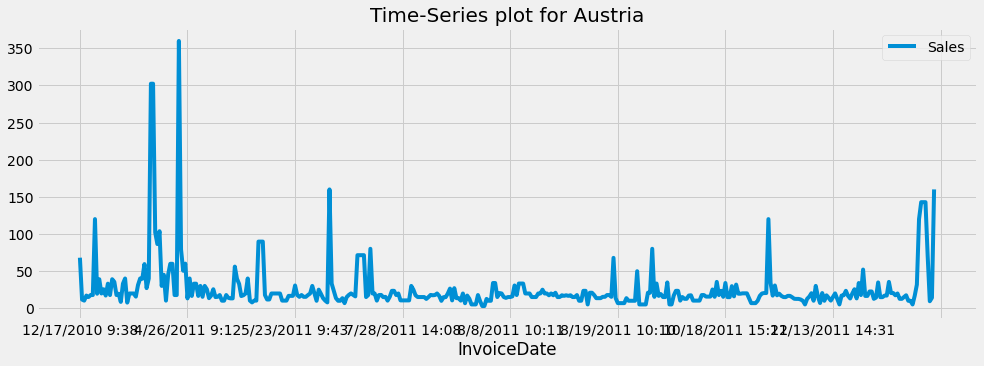

In [ ]:
#!!!!!!!!!!
time_series('Austria')
plt.title('Time-Series plot for Austria', fontsize = 20)

Text(0.5, 1.0, 'Time-Series plot for Israel')

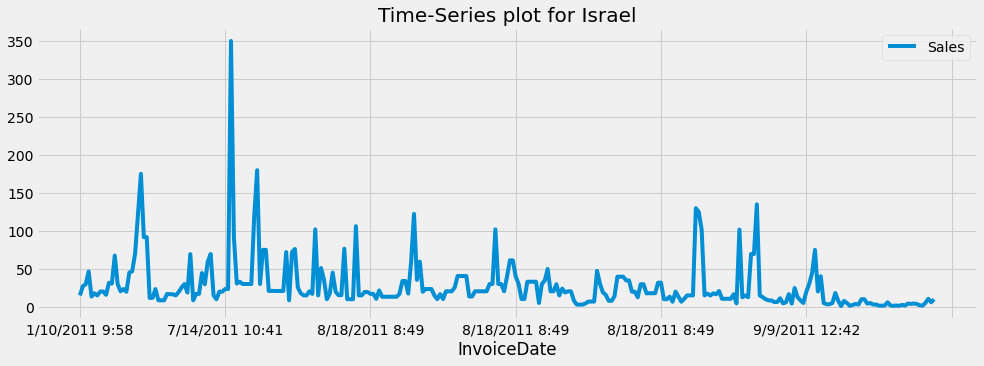

In [ ]:
#!!!!!!!!!!
time_series('Israel')
plt.title('Time-Series plot for Israel', fontsize = 20)

In [ ]:
time_series('')  #enter a country and run cell
plt.title('Time-Series plot for ', fontsize = 20)

In [ ]:
time_series('')   #enter a country and run cell
plt.title('Time-Series plot for ', fontsize = 20)

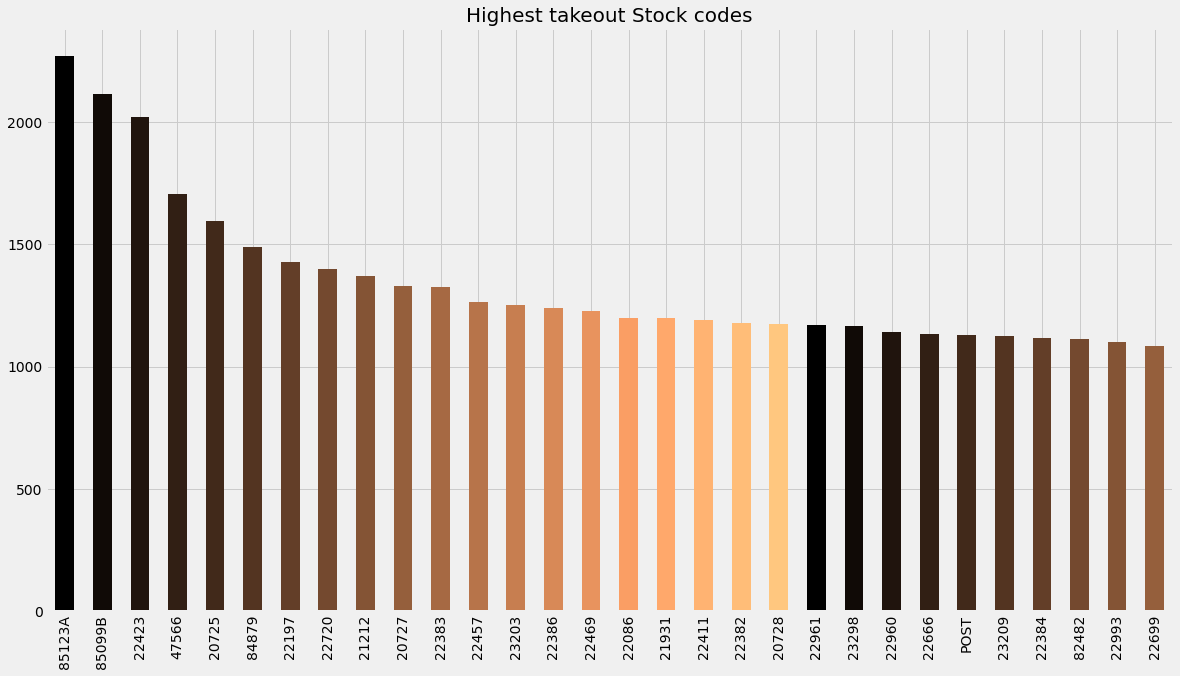

In [ ]:
# looking the stockcode for the datset

color = plt.cm.copper(np.linspace(0, 1, 20))
data['StockCode'].value_counts().head(30).plot.bar(color = color, figsize = (18, 10))
plt.title('Highest takeout Stock codes', fontsize = 20)
plt.show()

In [ ]:
# REmoving extra spaces in the description 
data['Description'] = data['Description'].str.strip() 
  
# Dropping the rows without any invoice number 
data.dropna(axis = 0, subset =['InvoiceNo'], inplace = True) 
data['InvoiceNo'] = data['InvoiceNo'].astype('str') 
  
# Dropping all transactions which were done on credit 
data = data[~data['InvoiceNo'].str.contains('C')] 

## Splitting the data according to the region of transaction

In [ ]:
# Transactions done in France 
basket_France = (data[data['Country'] =="France"] 
          .groupby(['InvoiceNo', 'Description'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('InvoiceNo')) 
  
# Transactions done in the United Kingdom 
basket_UK = (data[data['Country'] =="United Kingdom"] 
          .groupby(['InvoiceNo', 'Description'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('InvoiceNo')) 
  
# Transactions done in Portugal 
basket_Portugal = (data[data['Country'] =="Portugal"] 
          .groupby(['InvoiceNo', 'Description'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('InvoiceNo')) 
  
basket_Sweden = (data[data['Country'] =="Sweden"] 
          .groupby(['InvoiceNo', 'Description'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('InvoiceNo')) 

In [ ]:
def hot_encode(x): 
    if(x<= 0): 
        return 0
    if(x>= 1): 
        return 1

# Encoding the datasets 
basket_encoded = basket_France.applymap(hot_encode) 
basket_France = basket_encoded 
  
basket_encoded = basket_UK.applymap(hot_encode) 
basket_UK = basket_encoded 
  
basket_encoded = basket_Portugal.applymap(hot_encode) 
basket_Portugal = basket_encoded 
  
basket_encoded = basket_Sweden.applymap(hot_encode) 
basket_Sweden = basket_encoded 

## Buliding the models and analyzing the results

Used apriori algorithm with metrics as lift

model yeilds which items were brought together 

### France


In [ ]:
# Building the model 
frq_items = apriori(basket_France, min_support = 0.05, use_colnames = True) 
  
# Collecting the inferred rules in a dataframe 
rules = association_rules(frq_items, metric ="lift", min_threshold = 3) 
rules = rules.sort_values(['lift'], ascending =[False]) #sorted values in descending order of metric('lift')
rules.head(45)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
33,(PACK OF 6 SKULL PAPER CUPS),(PACK OF 6 SKULL PAPER PLATES),0.063776,0.056122,0.051020,0.800000,14.254545,0.047441,4.719388
32,(PACK OF 6 SKULL PAPER PLATES),(PACK OF 6 SKULL PAPER CUPS),0.056122,0.063776,0.051020,0.909091,14.254545,0.047441,10.298469
8,(CHILDRENS CUTLERY SPACEBOY),(CHILDRENS CUTLERY DOLLY GIRL),0.068878,0.071429,0.063776,0.925926,12.962963,0.058856,12.535714
9,(CHILDRENS CUTLERY DOLLY GIRL),(CHILDRENS CUTLERY SPACEBOY),0.071429,0.068878,0.063776,0.892857,12.962963,0.058856,8.690476
147,(ALARM CLOCK BAKELIKE RED),"(ALARM CLOCK BAKELIKE PINK, POSTAGE, ALARM CLO...",0.094388,0.061224,0.056122,0.594595,9.711712,0.050344,2.315646
136,"(ALARM CLOCK BAKELIKE PINK, POSTAGE, ALARM CLO...",(ALARM CLOCK BAKELIKE RED),0.061224,0.094388,0.056122,0.916667,9.711712,0.050344,10.867347
55,(ALARM CLOCK BAKELIKE RED),"(ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELI...",0.094388,0.073980,0.063776,0.675676,9.133271,0.056793,2.855230
50,"(ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELI...",(ALARM CLOCK BAKELIKE RED),0.073980,0.094388,0.063776,0.862069,9.133271,0.056793,6.565689
142,"(POSTAGE, ALARM CLOCK BAKELIKE GREEN)","(ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELI...",0.084184,0.073980,0.056122,0.666667,9.011494,0.049895,2.778061
141,"(ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELI...","(POSTAGE, ALARM CLOCK BAKELIKE GREEN)",0.073980,0.084184,0.056122,0.758621,9.011494,0.049895,3.794096
